# Проект "Принятие решений в бизнеесе"

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.\
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.\
<b>План выполнения проекта:</b>\
Шаг 1. Приоритизация гипотез\
Шаг 2. Анализ A/B-теста:
 - Предобработка данных.
 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
 - Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.  - Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Принять решение по результатам теста и объясните его. Варианты решений:
   1. Остановить тест, зафиксировать победу одной из групп.
   2. Остановить тест, зафиксировать отсутствие различий между группами.
   3. Продолжить тест.


<b>Описание данных</b>\
Данные для первой части:\
Файл hypothesis.csv. 
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 \
Данные для второй части:\

Файл orders.csv.
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


Файл visitors.csv.
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('C\\datasets\\hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth', None)
df.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Примение фреймворка ICE

In [5]:
df['ICE'] = (df['Impact']*df['Confidence'])/df['Efforts']

In [6]:
pd.set_option('display.max_colwidth', None)
display(df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


<b>Вывод:</b>  При приоритизации по ICE, наиболее важными являются гипотезы - "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Наименее влиятельная гипотеза - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

### Примение фреймворка RICE

In [7]:
df['RICE'] = ((df['Reach']*df['Impact']*df['Confidence'])/df['Efforts'])

In [8]:
pd.set_option('display.max_colwidth', None)
display(df[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<b>Вывод:</b> При приоритизации по RICE топ-гипотез отличается от предыдущего ранжирования. 3 наиболее важных гипотезы - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 

Наименне важная гипотеза осталась прежней - "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

Ранги в этих двух способах приоритизации отличаются, т.к. при расчете RICE дополнительно учитывется охват аудитории, т.е. на какое кол-во пользователей повлияет внедрение этой идеи. Соответсвенно, чем больше охват - тем важнее гипотеза. Для большей точности рекомендую опираться на ранжирование по RICE, т.к. в этом случае мы сможем тестировать гипотезы на максимально большой группе пользователей. 

## Анализ A/B-теста.

### Предобработка данных.

Ознакомимся с данными и проведем предобработку при необходимости:

In [9]:

orders = pd.read_csv('C\\datasets\\orders.csv')

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [12]:
orders.columns = [x.lower() for x in orders.columns] #приведем названия колонок к корректному виду

In [13]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d') #приведем дату к корректному типу данных

In [14]:
orders = orders.drop_duplicates()

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 56.1+ KB


Явных дубликатов не обнаружено. Проверим данные на наличие неявных дубликатов:

In [16]:
clients = orders.groupby('visitorid').agg({'group':['nunique','unique']})
clients.columns = ['group_count','group']
print(len(clients))
display(clients.head())
clients = clients.query('group_count>1').reset_index()
display(clients.head(5))
len(clients)

1031


,group_count,group
visitorid,,
5114589,1,[B]
6958315,1,[B]
8300375,2,"[B, A]"
11685486,1,[A]
39475350,1,[B]


,visitorid,group_count,group
0,8300375,2,"[B, A]"
1,199603092,2,"[A, B]"
2,232979603,2,"[B, A]"
3,237748145,2,"[B, A]"
4,276558944,2,"[B, A]"


58

Из 1031 уникального клиента, 58 попали в обе группы. Такого не должно происходить - это означает что на этапе А/А тестирования произошли ошибки. Кол-во небольшое, но для чистоты эксперимента удалим этих дублеров.

In [17]:
orders = pd.merge(orders, clients, on=['visitorid'], how='outer', indicator=True).query("_merge != 'both'").drop('_merge', axis=1).reset_index(drop=True)
orders.columns = ['transactionid', 'visitorid', 'date', 'revenue', 'group', 'group_count', 'group_n']
orders = orders[['transactionid', 'visitorid', 'date', 'revenue', 'group']]
display(orders.head())


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1016 non-null   int64         
 1   visitorid      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 39.8+ KB


Дубликаты удалены. 

In [19]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [22]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d') #приведем дату к корректному типу данных

In [23]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<b>Вывод:</b> При рассмотрении данных были выделены неправильно стилистически офорпмленные заголовки колонок и некорректный тип данных у дат. Эти моменты были исправлены.

### График кумулятивной выручки по группам

In [24]:
datesGroups = orders[['date','group']].drop_duplicates() 

In [25]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [26]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [27]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transaction', 'visitors', 'revenue', 'visitors_count']

display(cumulativeData.head(5)) 

,date,group,transaction,visitors,revenue,visitors_count
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


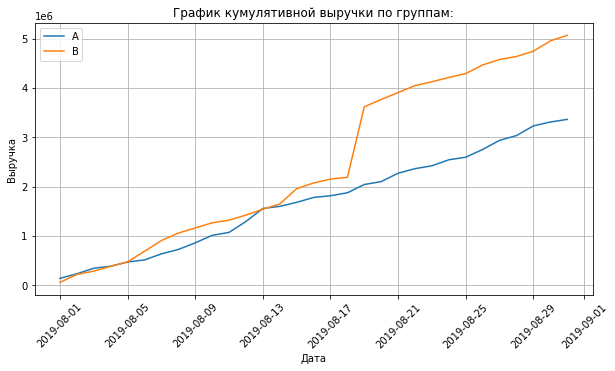

In [28]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transaction']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transaction']]

plt.figure(figsize=(10,5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам:')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.show()


In [29]:
display(cumulativeData.query(' "2019-08-17" <= date <= "2019-08-18"'))

,date,group,transaction,visitors,revenue,visitors_count
32,2019-08-17,A,265,251,1817160,10459
33,2019-08-17,B,320,314,2155542,10434
34,2019-08-18,A,278,264,1876741,11127
35,2019-08-18,B,327,321,2190865,11171


<b>Вывод:</b> на графике мы видим, что выручка в обоих группах растет. Но показатели группы А более плавные и на 01.09.2019  значительно ниже выручки группы В. Также на графике виден резкий рост выручки в группе В 18.08.2019 на который стоит обратить внимание и проанализировать сторонние факторы, которые могли повлиять на увеличение кол-ва клиентов и заказов в этот день.

### График кумулятивного среднего чека по группам

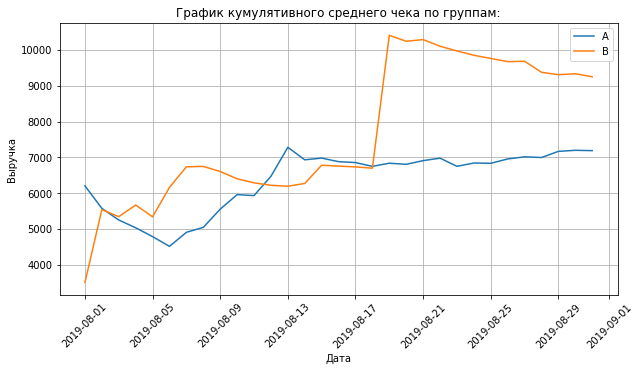

In [30]:
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transaction'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transaction'], label='B')
plt.legend() 
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам:')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.show()

<b>Вывод:</b> средний чек изначально был выше у группы А, но к 06.08  значительно снизился по отношению к группе В. После этого был резкий рост который достиг пика 13.08 и после этого оставался достаточно стабильным до конца рассматриваемого периода. Группа В показывает скачкообразный рост с пиками 4.08, 8.08 и максимальным пиком 18.08. После этого средний чек постепенно пошел на снижение. 

### График относительного изменения кумулятивного среднего чека группы B к группе A.

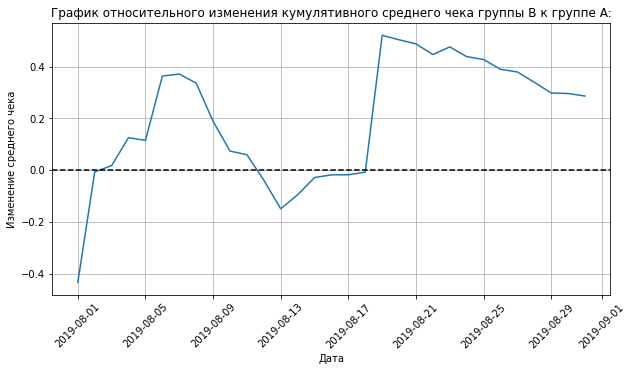

In [31]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A:')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.grid()
plt.show()

<b>Вывод:</b> разница в средних чеках достаточно значительная - график "скачет" - значит есть аномалии и крупные заказы. 

### График кумулятивного среднего количества заказов на посетителя по группам.

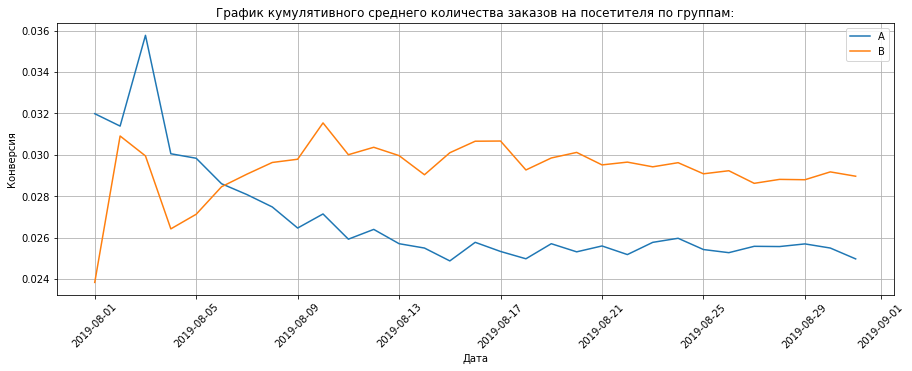

In [32]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['transaction']/cumulativeData['visitors_count']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам:')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.show()

<b>Вывод:</b> с 01.08 по 09.08 есть резкие колебания конверсии в обеих группах, при этом группа А показывает резкий спад, а группа В - резкий рост. Вероятно есть внешние факторы, которые повлияли на такое поведение покупателей. После 09.08 показатели обеих групп были достаточно стабильны, при этом конверсия группы А значительно меньше чем у группы В. 

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

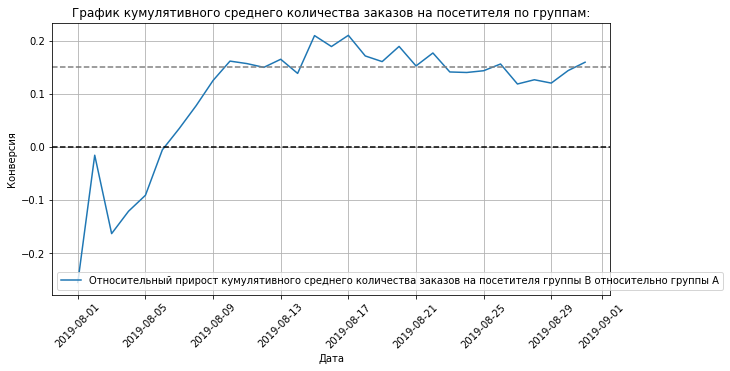

In [33]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

plt.xticks(rotation=45)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам:')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid()
plt.show()

<b>Вывод:</b> показатели в первые шесть дней сильно колебались - то значительно снижались, то возрастали и после 06.08 окончательно превысили группу А.  

### Точечный график количества заказов по пользователям

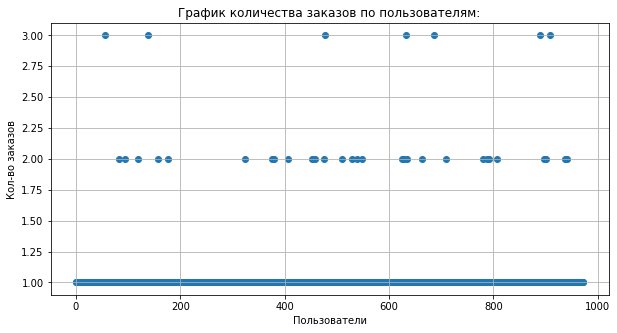

In [34]:
pivot_orders = orders.pivot_table(
    index='visitorid', values='transactionid', aggfunc='count'
).reset_index()
pivot_orders.columns = ['user', 'orders']
x_values = pd.Series(range(0,len(pivot_orders['orders'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, pivot_orders['orders']) 
plt.title('График количества заказов по пользователям:')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.grid()
plt.show()

<b>Вывод:</b> большинство покупателей делали 1 или 2 заказа. Свыше двух - редкие значения, скорее всего аномалии.

### 95-й и 99-й перцентили количества заказов на пользователя

In [35]:
print(np.percentile(pivot_orders['orders'], [95, 99])) 

[1. 2.]


<b>Вывод:</b> Не более 5% пользователей сделали 2 заказа и не более 1% клиентов сделали 4 заказа. Следовательно - клиенты, которые делали 4 и более заказов - аномалии. 

###  Точечный график стоимостей заказов

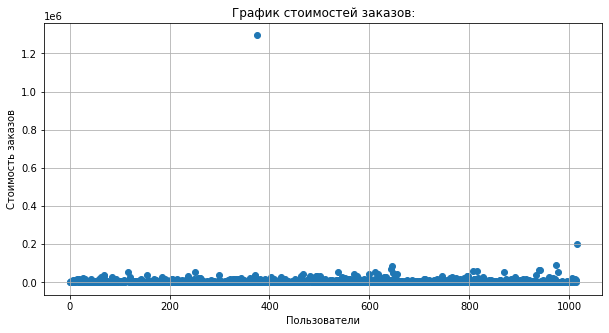

In [36]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов:')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.grid()
plt.show()

<b>Вывод:</b> на графике видно 2 выброса - 200 000 и свыше 1.2 млн. Это явные аномалии. 

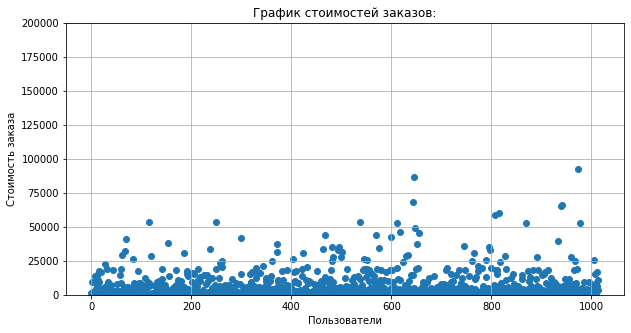

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов:')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 200000)
plt.grid()
plt.show()

<b>Вывод:</b> после отсечения слишком больших аномалий, можно увидеть, что основная часть заказов стоила до 25 000. Свышее точечные явления, которые можно назвать аномалиями.

### 95-й и 99-й перцентили стоимости заказов

In [38]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


<b>Вывод:</b> Расчет персентилей подтверждает выводы графика и чуть-чуть корректирует вывод - не более 5% заказов превышают стоимость 26 785 и не более 1% заказов превышают 53 904 по стоимости. Эти заказы - аномалии.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Проверим гипотезы: 
- H0 - Нет различий между выборками по среднему кол-ву заказов на посетителя без учета аномалий.
- H1 - Есть различия между выборками по среднему кол-ву заказов на посетителя без учета аномалий. 

In [39]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,23,162043,37,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,72,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,94,474413,89,475648,756,707,3318,3280


In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['user', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['user', 'orders'] 

In [41]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [42]:
print(f'p-value =',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
0.160


<b>Вывод:</b> p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, - отвергаем.

Относительный выигрыш группы B по конверсии равен 13.8%.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Проверим гипотезы: 
- H0 - Нет различий между выборками по среднему чеку заказа без учета аномалий.
- H1 - Есть различия между выборками по среднему чеку заказа без учета аномалий.

In [43]:
print(f'p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
0.287


<b>Вывод:</b> p-value значительно больше - соответственно, подтверждается нулевая гипотеза о том, что в средних чеках нет статистически значимой разницы. При этом относительная разница в средних чеках между группой В и группой А - 25.9%. Вероятно в разрезе общей картины - это различие не является стат.значимым.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

- H0 - Нет различий между выборками по среднему кол-ву заказов на посетителя с учетом аномалий.
- H1 - Есть различия между выборками по среднему кол-ву заказов на посетителя с учетом аномалий.

In [44]:
usersWithManyOrders = pd.concat(
 [
 ordersByUsersA[ordersByUsersA['orders'] > 2]['user'],
 ordersByUsersB[ordersByUsersB['orders'] > 2]['user'],
 ],
 axis=0,)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
 pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
 .drop_duplicates())
print(abnormalUsers.head())


58      611059232
211    2108163459
310    2988190573
409    3908431265
416    3967698036
dtype: int64


In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [46]:
print(f'p-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.009
0.189


<b>Вывод:</b> p-value меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, - отвергаем и подтверждаем предыдущий вывод по "сырым" данным. Разница между группами - 17.3%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

- H0 - Нет различий между выборками по среднему чеку с учетом аномалий.
- H1 - Есть различия между выборками по среднему чеку с учетом аномалий.

In [47]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.762
-0.022


<b>Вывод:</b> Разница между группами изменилась - теперь группа В показывает худший результат в сравнении с группой А на 2%. Предыдущий вывод подтверждается - статистистически значимых различий в чеках нет. 

### Итоговый вывод по A/B тестированию

- При сравнении "сырых" и "очишенных" данных по среднему кол-ву заказов выявлены статистически значимые различия в размере 17.3% в выигрыше для группы В.
-  Отностиельные показатели средних чеков с аномалиями и без них отличаются, эти значения не влияют на общюю картину, т.к. разница в в средних чеках всего 2%. Это значение не является стат.значимым.

Можно принять решение остановить тест, зафиксировав победу группы В, т.к. относительный выигрыш группы B по конверсии значителен.   